<a href="https://colab.research.google.com/github/PranavMGaikwad/LGM-VIPDatascience/blob/main/Task_1_Iris_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 **Importing the Iris Dataset**

In [ ]:
df = pd.read_csv('iris_data.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Studing Dataset**

In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
df.shape

(150, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df['species'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

**Imputing Missing Values**

In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

**Data Visualization**

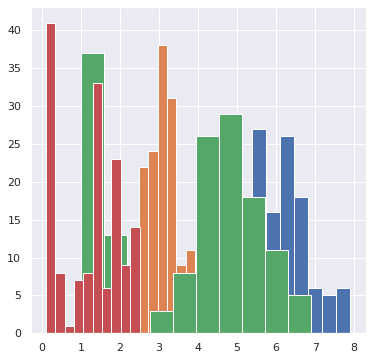

In [ ]:
# Histogram
df['sepal_length'].hist() # Blue
df['sepal_width'].hist()  # Yellow
df['petal_length'].hist() # Green
df['petal_width'].hist()  # Red

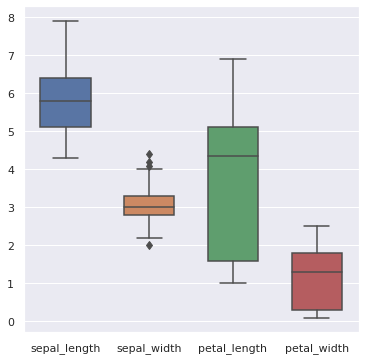

In [ ]:
# Box Plot
sns.boxplot(data = df, width = 0.6, fliersize=6)
sns.set(rc = {"figure.figsize" : (6,6)})

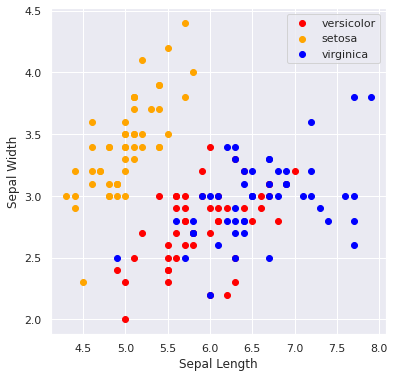

In [ ]:
# Scartterplot                      # Between Sepal Length and Sepal Width of different species.
colors = ['red', 'orange', 'blue']
species = ['versicolor', 'setosa', 'virginica']
for i in range(3):
  x = df[df['species'] == species[i]]
  plt.scatter(x['sepal_length'], x['sepal_width'], c = colors[i], label = species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

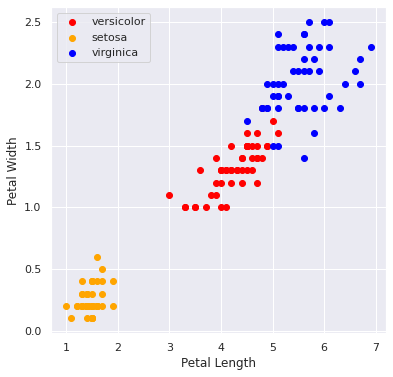

In [ ]:
# Scartterplot                      # Between Petal Length and Petal Width of different species.
colors = ['red', 'orange', 'blue']
species = ['versicolor', 'setosa', 'virginica']
for i in range(3):
  x = df[df['species'] == species[i]]
  plt.scatter(x['petal_length'], x['petal_width'], c = colors[i], label = species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

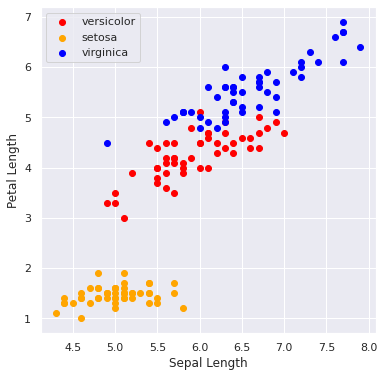

In [ ]:
# Scartterplot                      # Between Sepal Length and Petal Length of different species.
colors = ['red', 'orange', 'blue']
species = ['versicolor', 'setosa', 'virginica']
for i in range(3):
  x = df[df['species'] == species[i]]
  plt.scatter(x['sepal_length'], x['petal_length'], c = colors[i], label = species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

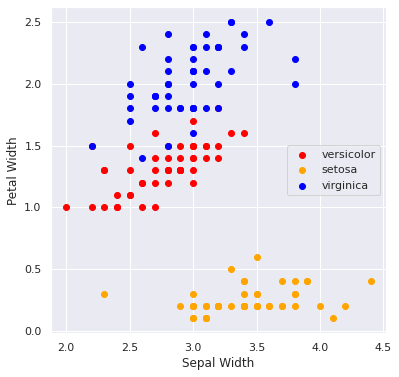

In [ ]:
# Scartterplot                      # Between Sepal Width and Petal Width of different species.
colors = ['red', 'orange', 'blue']
species = ['versicolor', 'setosa', 'virginica']
for i in range(3):
  x = df[df['species'] == species[i]]
  plt.scatter(x['sepal_width'], x['petal_width'], c = colors[i], label = species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

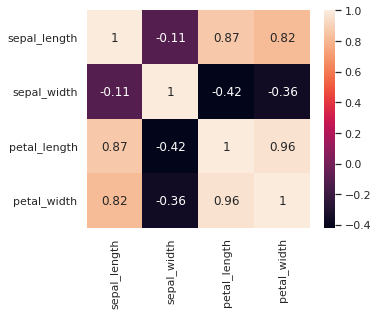

In [ ]:
# Heatmap
# Used to determine the corelation between columns.

corr = df.corr()
plt.figure(figsize= (5,4))
sns.heatmap(corr, annot = True)
df.columns

**Label Encoder**

We use label encoder because many times a dataset may contain multiple labels in one or more than one columns in form of words or numbers. So label encoder converts the labels into numeric form so as to convert it into machine readable form.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Model Training**

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['species'])
Y = df['species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Training the Model.

model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print("Accuracy : ", model.score(x_test, y_test))

Accuracy :  0.9555555555555556
